<a href="https://colab.research.google.com/github/LeonardoMorales/YogaPoseClassification-App/blob/master/Yoga_Pose_Classification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Import NN layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data
import numpy as np # for math and arrays
import pandas as pd
import seaborn as sns # for plotting

In [ ]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

In [ ]:
all_ds = pd.read_csv('Test5_YogaPoses_Nums_Completed.csv')
all_ds

,POSE,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
0,0,8.533379,2.493388,155.628118,167.744911,65.308848,69.156519,8.163497,10.022567
1,0,4.083005,7.058673,162.490382,164.203458,86.062801,92.487008,19.074113,15.664330
2,0,10.713288,5.973813,160.446161,165.091847,85.984780,88.687401,18.324295,14.579814
3,0,10.192227,4.999405,146.517574,168.168232,66.525332,79.147658,11.740945,14.509123
4,0,6.541231,14.255083,153.434766,177.832598,97.035200,77.687719,25.451624,19.056081
...,...,...,...,...,...,...,...,...,...
535,11,32.341280,34.697163,132.943775,133.399059,170.746287,165.237470,179.583760,179.296062
536,11,27.870505,26.599099,132.554728,133.879904,163.078430,169.962854,174.953182,179.924549
537,11,25.244714,24.815232,171.262694,171.958400,167.918958,166.584342,179.591163,177.714350
538,11,24.983732,18.345772,161.487519,179.777819,170.559495,168.409232,179.217187,177.440177


In [ ]:
print(f'Humber of rows/examples and columns in the dataset: {all_ds.shape}')

Humber of rows/examples and columns in the dataset: (540, 9)


In [ ]:
# Summary of information on the dataset
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSE                540 non-null    int64  
 1   LeftShoulderAngle   540 non-null    float64
 2   RightShoulderAngle  540 non-null    float64
 3   LeftElbowAngle      540 non-null    float64
 4   RightElbowAngle     540 non-null    float64
 5   LeftHipAngle        540 non-null    float64
 6   RightHipAngle       540 non-null    float64
 7   LeftKneeAngle       540 non-null    float64
 8   RightKneeAngle      540 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 38.1 KB


In [ ]:
# Shuffle the rows to make sure the data is not sorted
all_ds = all_ds.sample(frac=1)
all_ds

,POSE,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
356,7,37.997893,27.631339,68.008347,68.084145,53.100875,56.812489,39.109458,40.450327
306,6,173.212658,168.772107,158.197116,139.825201,178.330188,139.090782,177.589812,46.456901
8,0,13.928125,43.130985,145.725273,174.391358,135.580225,160.338349,64.448729,17.305842
339,7,21.059987,13.422742,51.323728,48.523747,54.044787,51.672294,39.035542,37.670689
278,6,170.636663,174.120855,136.588515,134.552924,124.410270,172.960447,22.243385,170.800191
...,...,...,...,...,...,...,...,...,...
16,0,21.424845,27.107781,173.129408,171.473019,127.470058,119.419219,39.161501,50.480122
296,6,178.527676,179.726282,159.746503,148.318746,134.478734,172.457240,56.955298,162.153254
511,11,2.462386,0.770261,159.747702,169.554037,176.952935,174.593104,165.340838,162.368955
192,4,28.835857,172.963985,168.480331,156.571869,133.364689,121.808764,149.690972,123.540924


## Spit Data into Train/test split

In [ ]:
# Split the data into 80% train and 20% test (later will divide the test to test and validate)
train_dataset, temp_test_dataset = train_test_split(all_ds, test_size=0.2)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(432, 9)
(108, 9)


In [ ]:
# Split the test_dataset dataframe to 50% test and 50% validation
test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)

print(test_dataset.shape)
print(valid_dataset.shape)

(54, 9)
(54, 9)


In [ ]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset     : {train_dataset.shape}")
print(f" Test  dataset     : {test_dataset.shape}")
print(f" Valid dataset     : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset     : (432, 9)
 Test  dataset     : (54, 9)
 Valid dataset     : (54, 9)


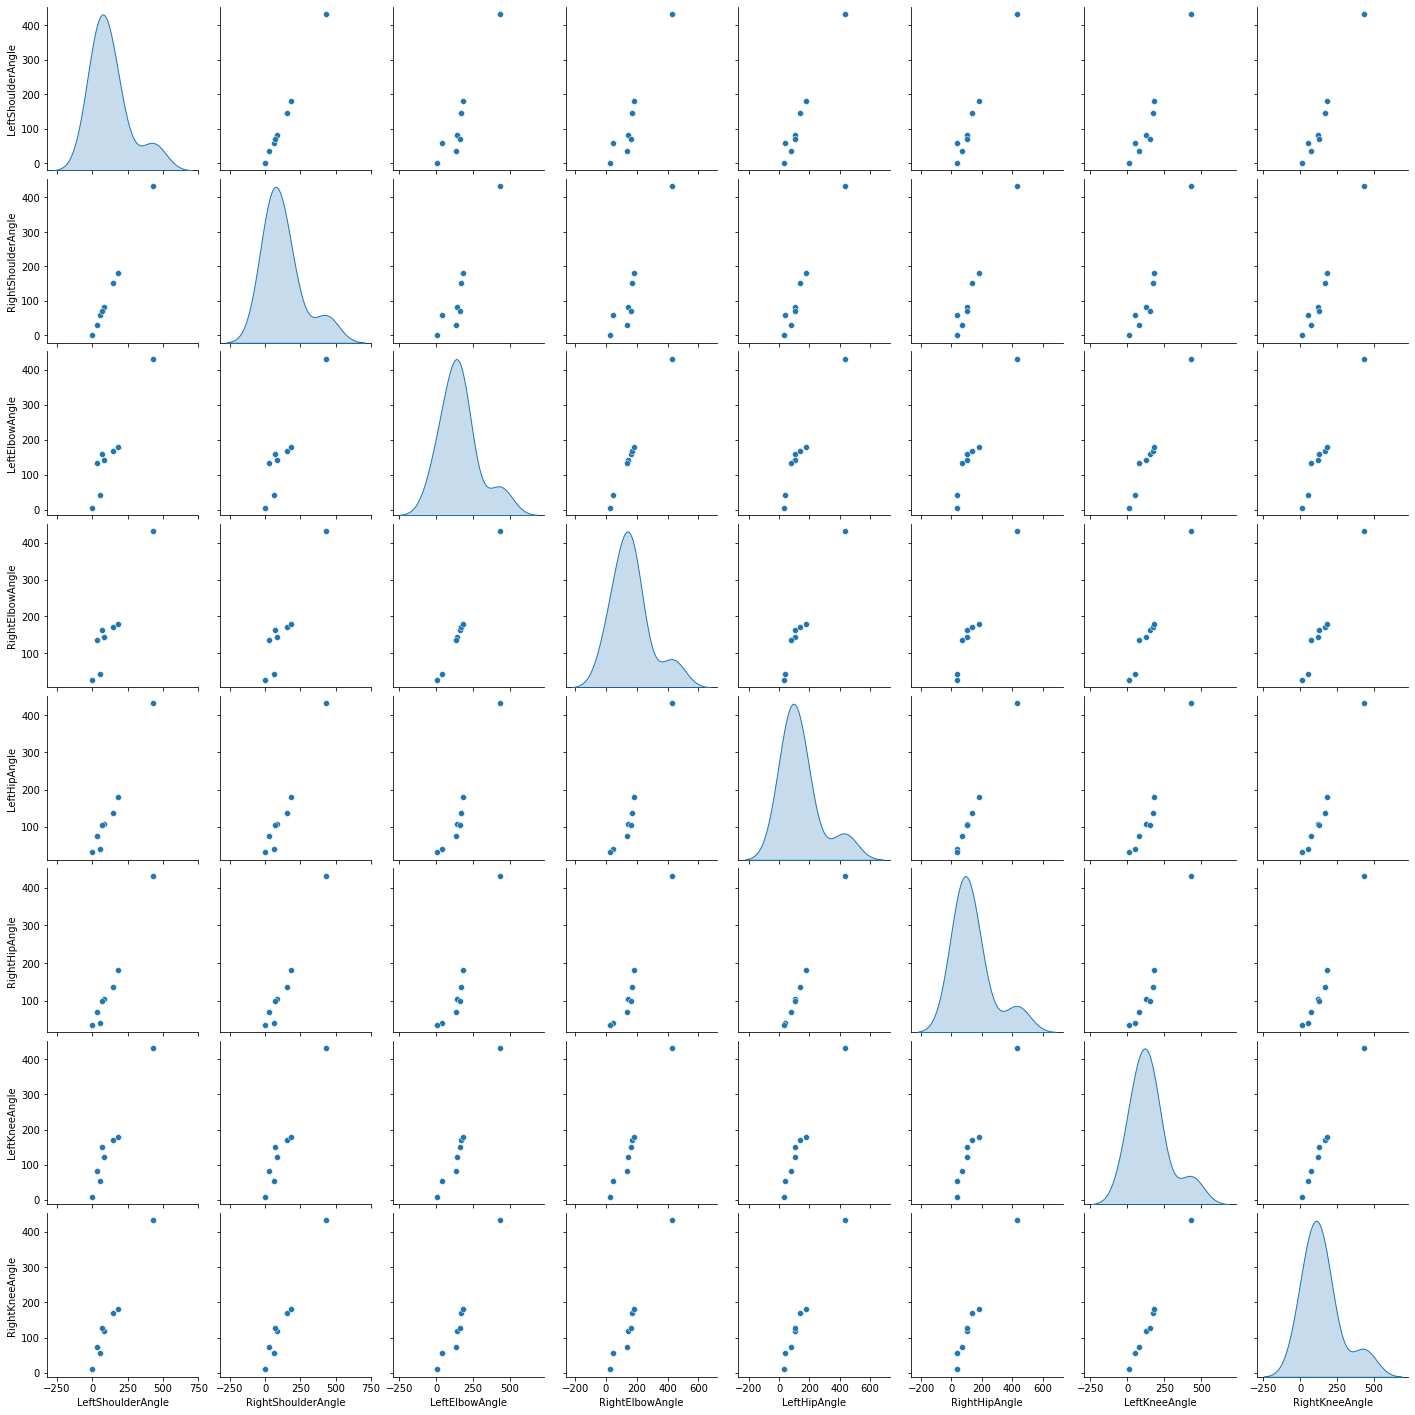

In [ ]:
# Plot the relationship between each two variables to spot anything incorrect

train_stats = train_dataset.describe()
train_stats.pop("POSE")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [ ]:
# Statistics on the train dataset to make sureit is in a good shape. (You may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("POSE")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
LeftShoulderAngle,432.0,81.971823,58.651467,0.506935,33.919083,69.487701,146.603243,179.887471
RightShoulderAngle,432.0,80.949373,60.042641,0.107248,29.412995,69.256003,151.998784,179.975379
LeftElbowAngle,432.0,141.700956,42.488234,5.472170,132.380176,160.460707,168.984666,179.984053
RightElbowAngle,432.0,144.145222,42.517405,26.953156,136.220520,164.258374,171.863054,179.917401
LeftHipAngle,432.0,107.083887,40.900613,30.772420,75.819114,104.441538,137.399343,179.954858
RightHipAngle,432.0,103.544109,39.559200,35.674085,69.590238,99.704919,135.305385,179.867640
LeftKneeAngle,432.0,122.986830,54.500052,8.163497,81.754808,151.257355,170.521577,179.989053
RightKneeAngle,432.0,118.209458,54.990222,10.022567,74.067459,128.533036,168.794356,179.924549


In [ ]:
train_labels1 = train_dataset.pop("POSE")
test_labels1 = test_dataset.pop("POSE")
valid_labels1 = valid_dataset.pop("POSE")

In [ ]:
train_labels = pd.get_dummies(train_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')

train_labels

,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11
396,0,0,0,0,0,0,0,0,1,0,0,0
52,0,1,0,0,0,0,0,0,0,0,0,0
42,1,0,0,0,0,0,0,0,0,0,0,0
387,0,0,0,0,0,0,0,0,1,0,0,0
69,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,0,0,0,1,0,0,0,0,0,0,0
84,0,1,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0,0,0,1,0,0,0,0,0


# Data Normalization/Scaling

## Substract the mean of the training data and divide by the standar deviation of the training data.

In [ ]:
# Define a function to normalize the data set
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [ ]:
# Show a sample of the data after normalization
normed_test_data.head(10)

,LeftShoulderAngle,RightShoulderAngle,LeftElbowAngle,RightElbowAngle,LeftHipAngle,RightHipAngle,LeftKneeAngle,RightKneeAngle
129,-0.625991,-0.724327,-2.130797,-2.199224,-1.021531,-1.526017,-0.437583,-0.265547
476,-0.995985,-1.343080,-2.953819,-2.385458,0.226579,0.274257,-0.002211,0.047593
523,-1.145051,-0.882231,-1.315858,-0.269977,1.455398,1.698218,0.950681,0.988732
401,0.276028,0.151621,0.666224,0.491132,0.772507,-1.028069,0.841707,0.784675
352,-0.793922,-0.723710,-1.762079,-1.849545,-0.394102,-0.775541,-1.260788,-1.266979
286,-0.786804,-0.948961,-2.686290,-2.533979,1.693556,0.847306,1.041601,-1.594798
83,-0.181275,-0.089094,0.792525,0.760874,0.005696,0.413333,-0.661828,-0.392866
210,-0.593652,1.565734,0.404824,0.109245,-0.060679,1.159382,0.516410,-0.115476
188,-0.760270,1.549197,0.758209,0.557984,0.190376,0.598352,0.980012,0.291089
496,-1.187669,-1.324237,-1.125421,0.189962,1.667078,1.930551,0.814157,0.975552


# Build a Neural Network Model

In [ ]:
def build_model_two_hidden_layers():
  model = Sequential()
  model.add(Dense(16, input_shape = (normed_train_data.shape[1],)))
  model.add(Dense(14, input_shape = (normed_train_data.shape[1],)))
  model.add(Dense(12, activation='softmax'))
  learning_rate = 0.00025
  optimizer = optimizers.Adam(learning_rate)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

EPOCHS = 250
batch_size = 2

model = build_model_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

# with tf.device('/CPU:0'):
with tf.device('/GPU:0'):
  history = model.fit(
      normed_train_data,
      train_labels,
      batch_size = batch_size,
      epochs = EPOCHS,
      verbose = 1,
      shuffle = True,
      steps_per_epoch = int(normed_train_data.shape[0] / batch_size),
      validation_data = (normed_valid_dataset, valid_labels)
  )

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                238       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                180       
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
216/216 [==============================] - 1s 3ms/step - loss: 2.7960 - accuracy: 0.0877 - val_loss: 2.5277 - val_accuracy: 0.1111
Epoch 2/250
216/216 [==============================] - 0s 1ms/step - loss: 2.4799 - accuracy: 0.1958 - val_loss: 2.2717 - val_accuracy: 0.3148
Epoch 3/250
216/216 [==============================] - 0s 1ms/step -

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
245,0.085773,0.974537,0.105482,0.981481,245
246,0.088604,0.967593,0.113555,0.962963,246
247,0.087339,0.967593,0.118337,0.962963,247
248,0.087456,0.969907,0.131949,0.944444,248
249,0.087465,0.976852,0.115403,0.962963,249


In [ ]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[3.4016068e-15, 2.1405262e-16, 1.7656804e-07, 3.1148722e-14,
        2.1089401e-09, 6.8423169e-09, 6.3033384e-10, 9.3658127e-02,
        2.6893793e-11, 3.8302303e-04, 9.0595865e-01, 9.9169028e-29],
       [2.3552584e-08, 2.1149192e-16, 1.5150085e-09, 4.6080395e-08,
        5.3162457e-09, 1.4359660e-13, 1.7005784e-03, 2.8421886e-05,
        5.1331859e-11, 7.2710353e-09, 9.9827087e-01, 1.8599996e-15],
       [1.1286623e-18, 3.3973721e-21, 5.6745128e-19, 4.8104316e-01,
        1.4841239e-08, 5.1982433e-12, 1.5954897e-14, 4.9082307e-23,
        8.3581281e-06, 1.0925921e-14, 5.7127834e-11, 5.1894850e-01],
       [9.7870757e-30, 1.1590139e-18, 3.4361142e-13, 2.5108533e-05,
        2.0928179e-04, 6.3062226e-04, 3.2737114e-22, 3.9808119e-20,
        9.9866140e-01, 4.7363000e-04, 1.2001862e-09, 2.7703653e-12],
       [2.0961212e-01, 8.7854339e-08, 1.5453933e-06, 1.5132562e-24,
        1.0942696e-16, 3.2436801e-29, 1.4407021e-01, 6.4512146e-01,
        1.9939808e-28, 4.7531359e-20, 1.1945

## See how the training went

In [ ]:
from matplotlib import pyplot as plt

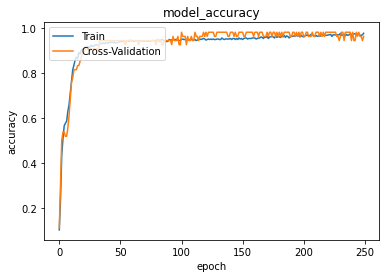

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

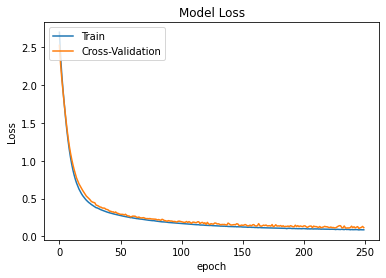

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [ ]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)
print('Accuracy: {:5.2f}'.format(accuracy))

Train Split: 
14/14 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9745
Accuracy:  0.97


In [ ]:
print('Evaluation Split: ')
loss, accuracy = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)
print("Accuracy: {:5.2f}".format(accuracy))

Evaluation Split: 
2/2 - 0s - loss: 0.1154 - accuracy: 0.9630
Accuracy:  0.96


In [ ]:
print('Test Split: ')
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Accuracy: {:5.2f}".format(accuracy))

Test Split: 
2/2 - 0s - loss: 0.8419 - accuracy: 0.9259
Accuracy:  0.93


In [ ]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix')

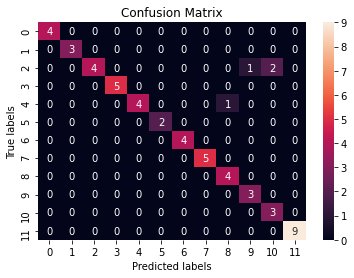

In [ ]:
ax = plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = predict_results.argmax(axis = 1)

cm = confusion_matrix(test_labels1, predict_results)

sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
def getMaxValueAndPosition(arr) :
  max = arr[0]
  pos = 0
  for i in range(0, len(arr)):    
  #Compare elements of array with max    
    if(arr[i] > max):
      max = arr[i]
      pos = i        
  
  print("Largest element present in given array: ", str(max), " at position: ", str(pos));

In [ ]:
positionPredict = 17
predict = model.predict(normed_test_data)
predict = predict[positionPredict]
print("Predict value: ",predict)
getMaxValueAndPosition(predict)
result = test_labels1.iat[positionPredict]
print("Real value: ", result)

Predict value:  [1.1088368e-04 6.9007058e-15 3.3130609e-11 7.2840666e-15 3.7783568e-14
 1.6191257e-30 9.9970835e-01 1.0449959e-10 4.8559026e-22 2.1357853e-20
 1.8084398e-04 2.9833358e-16]
Largest element present in given array:  0.99970835  at position:  6
Real value:  6


## Save Model

In [ ]:
keras_file = "ypc_m4.h5"
tf.keras.models.save_model(model, keras_file)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("ypc_m4.tflite", "wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmptnc_d516/assets


3948